# CA2_DP_ML_HDip_Lvl8

# Background

### Dataset Information 

   The NHANES dataset was created to assess the health and nutritional status of adults and children in the
United States. This dataset is funded by the Centers for Disease Control and Prevention (CDC), specifically
through its National Center for Health Statistics (NCHS). The data is based on the survey respondents
throughout the United States. Data was gathered through interviews, physical examinations, and laboratory
tests. For this subset respondents 65 years old and older were labeled as “senior” and all individuals under
65 years old as “non-senior.”

### Task:
   As a data analyst, your task is to prepare and analyse the data set using appropriate data preparation and
apply the machine learning models for the specified tasks. Your analysis should aim to identify any
relationships or trends in the data. Recognise suitable independent variables and target variable from the
dataset to justify your classification/ prediction tasks. You can perform clustering on the dataset based on
your analysis if applicable. You can generate synthetic data or use any additional data to support your
machine learning models if required.


In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('NHANES_age_prediction.csv')

# Summary of the Dataset 

In [3]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [5]:
df.shape

(2278, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


### Missing Values

In [7]:
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

# About the Dataset 

1. There are 2278 observations and 10 features. 

### Variable Table. 
#### Found it here 
https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

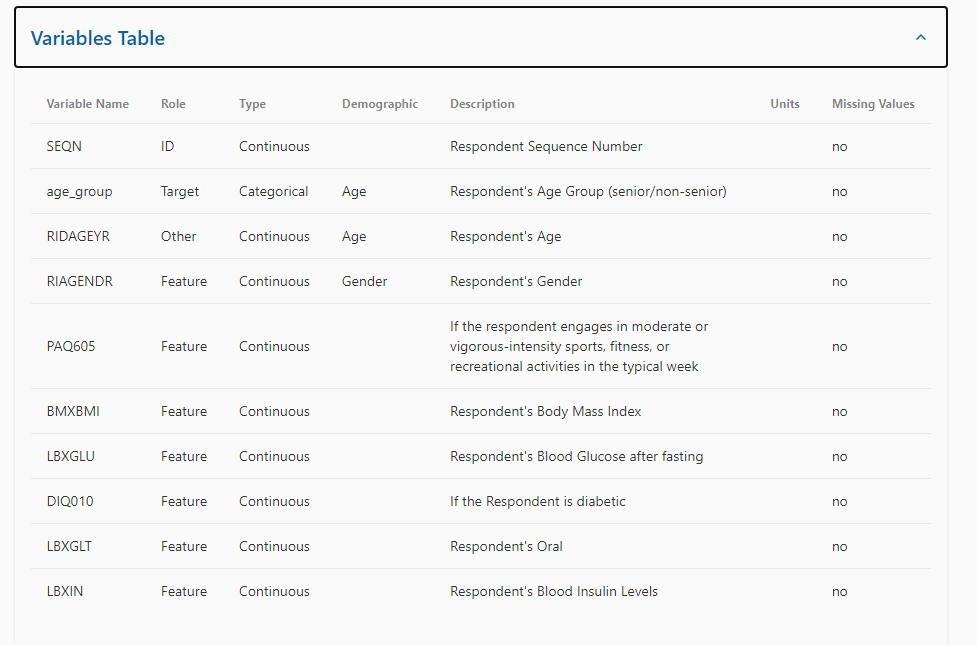



2. There is no missing values. 


# Plot Features Distribution 

#### Import Libraries. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

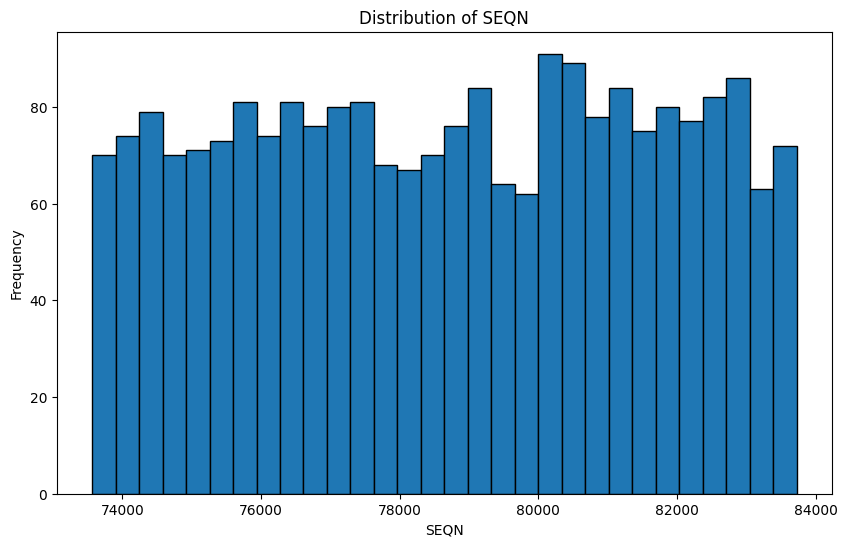

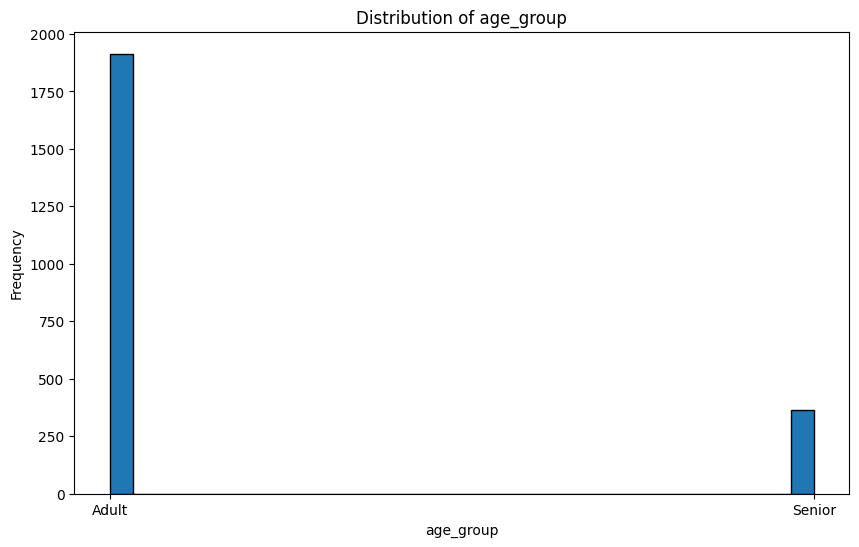

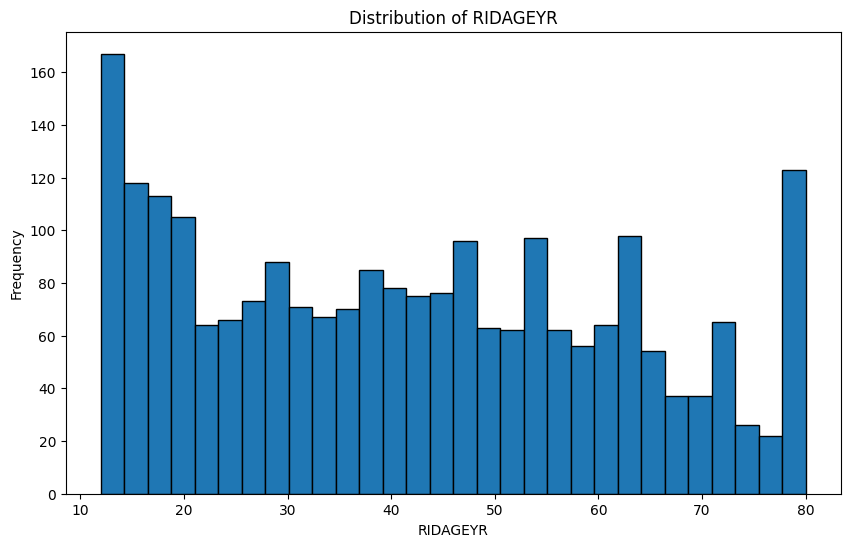

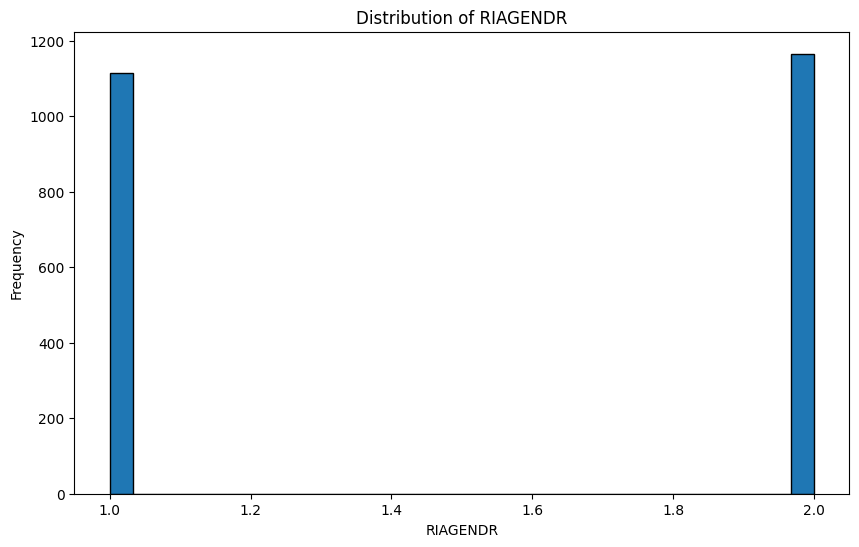

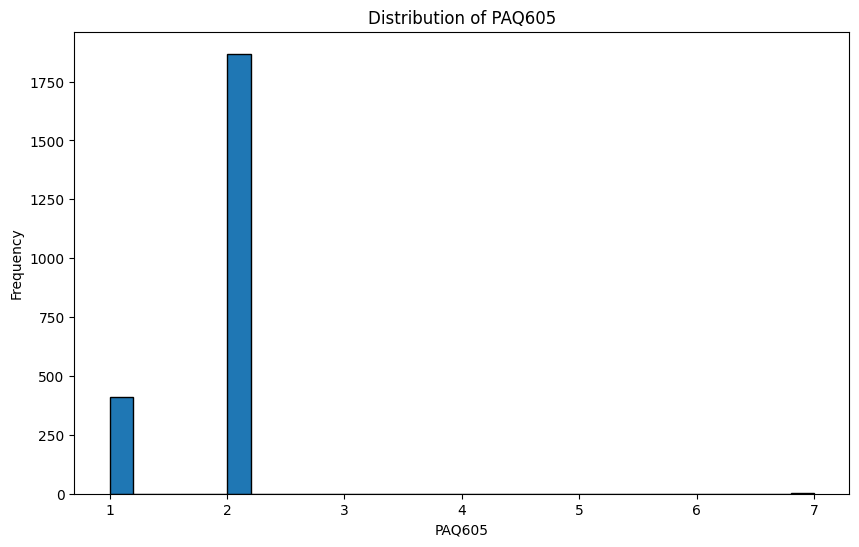

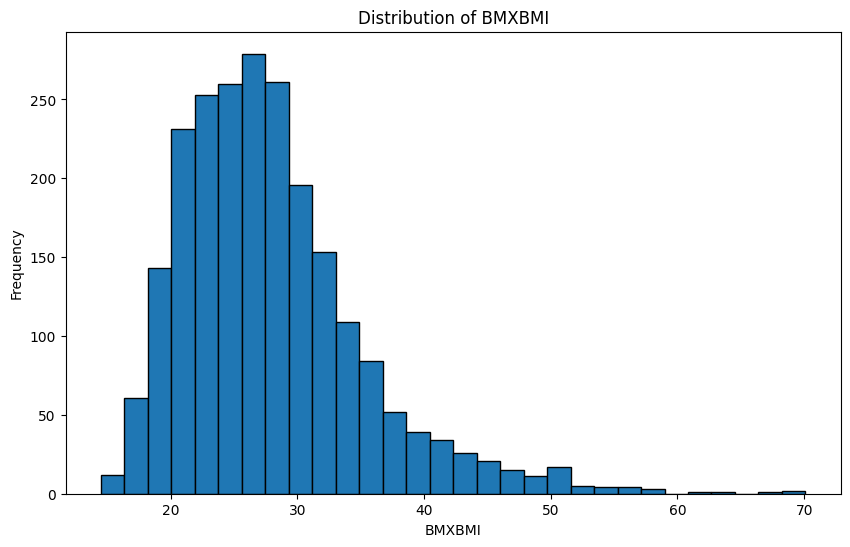

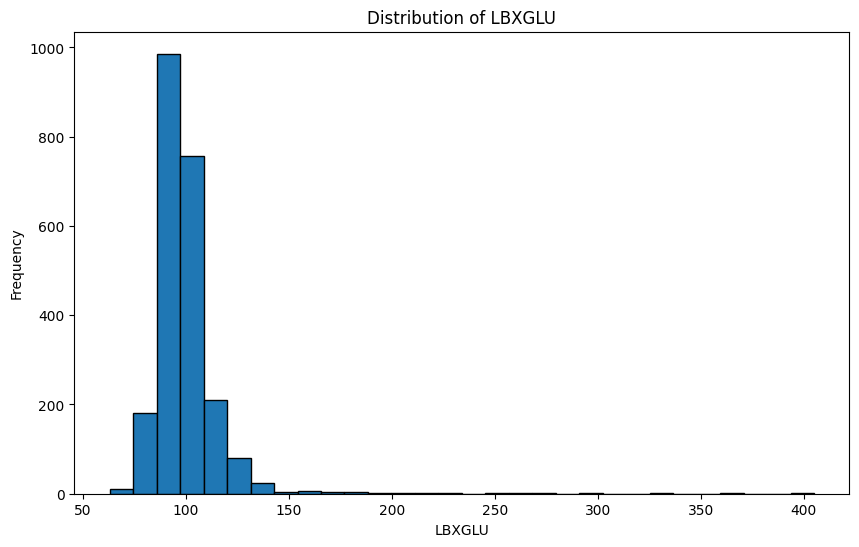

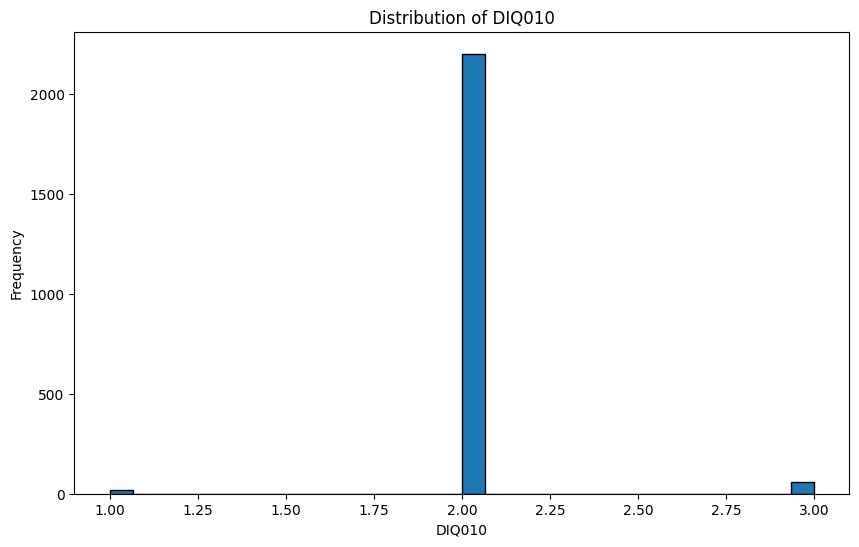

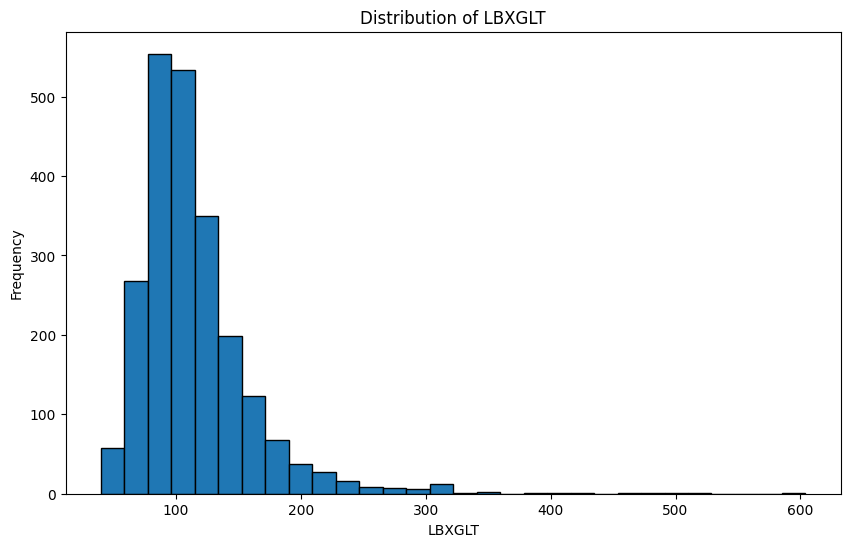

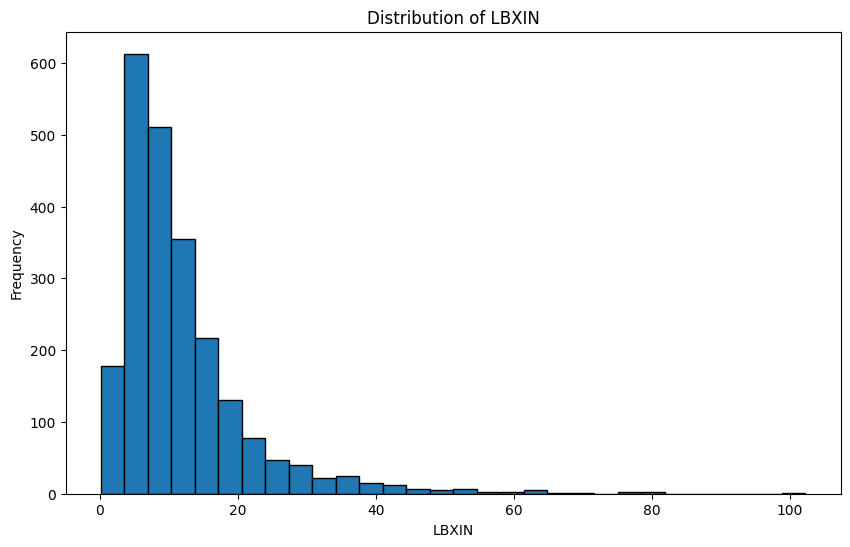

In [9]:
# In order to visualize each column individually I created a loop that says: for column in my dataset plot the histogram and, 
# Also, add title Distribution of with the name of the column. 
for column in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Renaming columns 

   As we have the variable table which describes each feature and the context of the data. To better understanding I will rename the columns to be able to analyze and describe my findings easily. 
   An Example of it is: In the dataset contains a column called RIAGENDR I will replace to Gender. This will not change the context of our data, I am just trying to change the name to understand what the column means. 
   
   BEFORE: RIAGENDR
   AFTER: Gender
   
   BEFORE: RIDAGEYR
   AFTER: Age
   
   

In [10]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [11]:
df.rename(columns={'RIAGENDR': 'Gender', 'RIDAGEYR': 'Age'}, inplace=True)

In [12]:
df.head()

,SEQN,age_group,Age,Gender,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


# EDA


##### Feature Age_group 

1. Using value_counts we can visualize the feature age_group and as we can see there are total of 1914 adult and 364 Senior. 

Important observation here is that we are dealing with a feature which is a unbalanced we have more adult than Senior and also, it is a string. 

##### Plans 

1. I will apply Label enconder as method to replace the text to numbers such as 0 and 1. 
2. the method responsable to create a synthetic data to fix the problem related to unbalanced data is called smote I will be applying it to my age group. 


In [13]:
df.age_group.value_counts(dropna=False)

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
le = LabelEncoder()

In [16]:
df['age_group']= le.fit_transform(df['age_group']) 

In [17]:
df['age_group'].unique() 

array([0, 1])

In [18]:
df.age_group.value_counts(dropna=False)

age_group
0    1914
1     364
Name: count, dtype: int64

### Why did I apply the method label Encoding instead of one-hot Enconding? 

###### It is reasonable choice to use Label Encoding instead of one-hot encoding due to one-hot encoding is more relevant when we are dealing with non-binary feature or when there are more than two values. Important fact is that if I had used one-hot Encoding I would have created more features which could cause the curse of dimensionality.

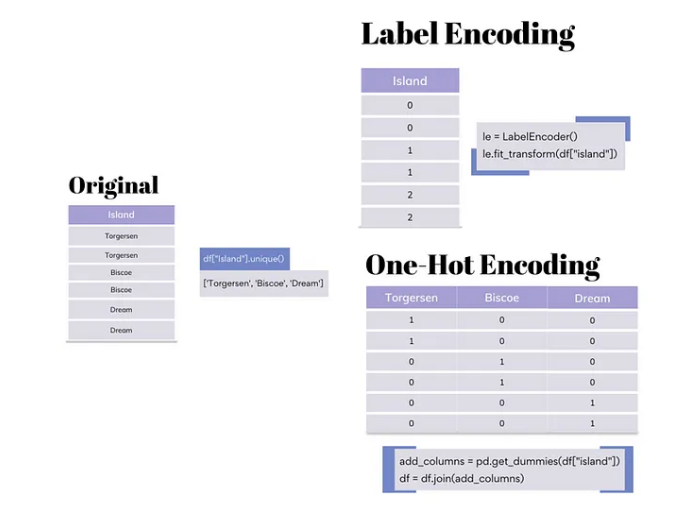

### As age group is our target in order to handle our unbalanced feature we must apply smote in our target, but, before we continue let's visualize our target.

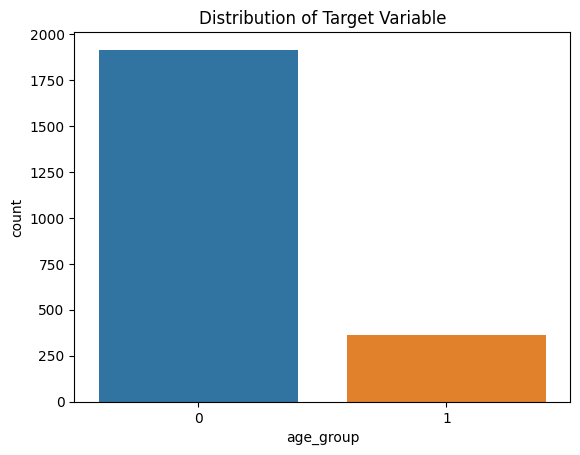

In [19]:
sns.countplot(x='age_group', data=df)
plt.title('Distribution of Target Variable')
plt.show()

###### We can visualize the distribution of our target and say 100% that we have unbalanced data to handle it,  let's apply smote as method. 

In [20]:
from imblearn.over_sampling import SMOTE


In [21]:
X = df.drop(['age_group'], axis=1)  # Features excluding the target
y = df['age_group']  # Numeric encoding of the target

In [22]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

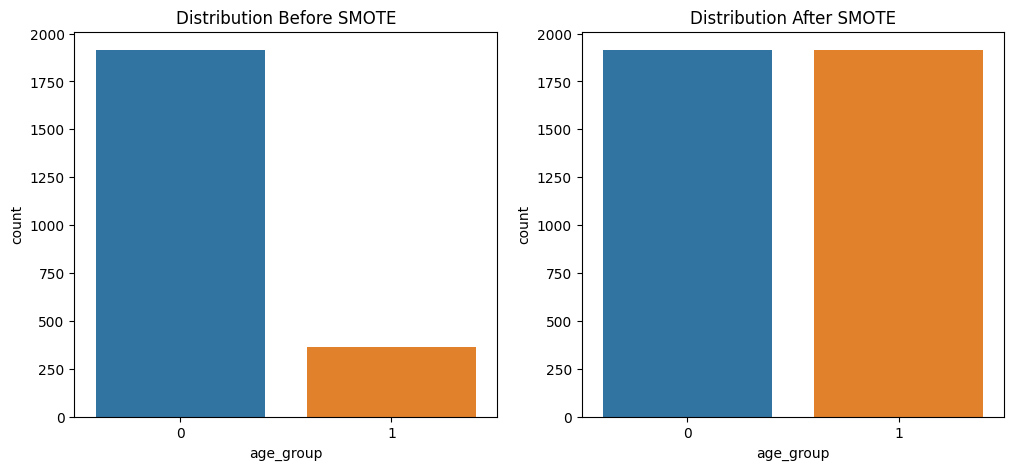

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='age_group', data=df)
plt.title('Distribution Before SMOTE')

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Distribution After SMOTE')

plt.show()

In [24]:
df1 = pd.DataFrame(X_resampled, columns=df.columns)

In [25]:
df1['age_group'] = y_resampled


In [26]:
df1.head()

,SEQN,age_group,Age,Gender,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [27]:
df1.LBXGLU.value_counts(dropna=False)

LBXGLU
96.000000     122
94.000000     119
99.000000     108
100.000000    103
95.000000     100
             ... 
111.871516      1
109.877284      1
84.805298       1
97.466017       1
113.057591      1
Name: count, Length: 1625, dtype: int64

In [28]:
df1.age_group.value_counts(dropna=False)

age_group
0    1914
1    1914
Name: count, dtype: int64

# After applying smote is clearly that our target is no longer unbalanced.


In [29]:
df.head()

,SEQN,age_group,Age,Gender,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [30]:
numeric_columns = df1.select_dtypes(include='number').columns


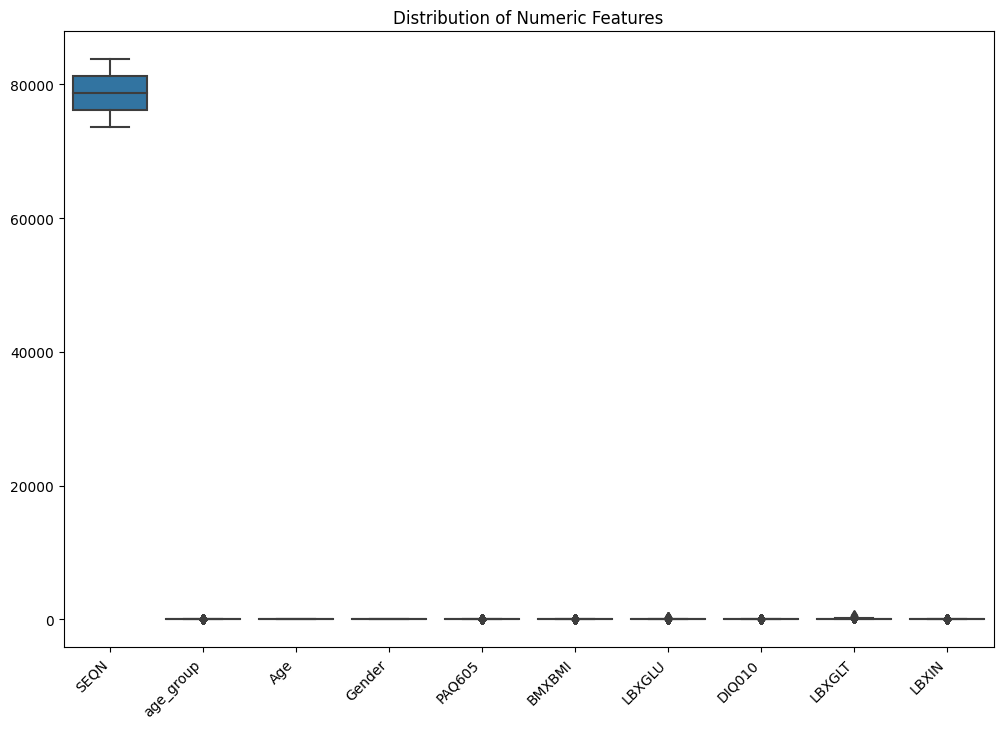

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Distribution of Numeric Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# This boxplot shows us that we have the most of features in the same scale except SEQN. 
#### Looking deeply in our data dictionary we assume that SEQN is not imporant for our analysis due to is a ID for each Respondent. As our feature is a ID it means that is only a feature to identify the Respondent we can drop it, because, It will not have affect in our model. 

In [32]:
df2 = df1.drop(columns='SEQN')


In [33]:
df2.head()

,age_group,Age,Gender,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


# Outliers

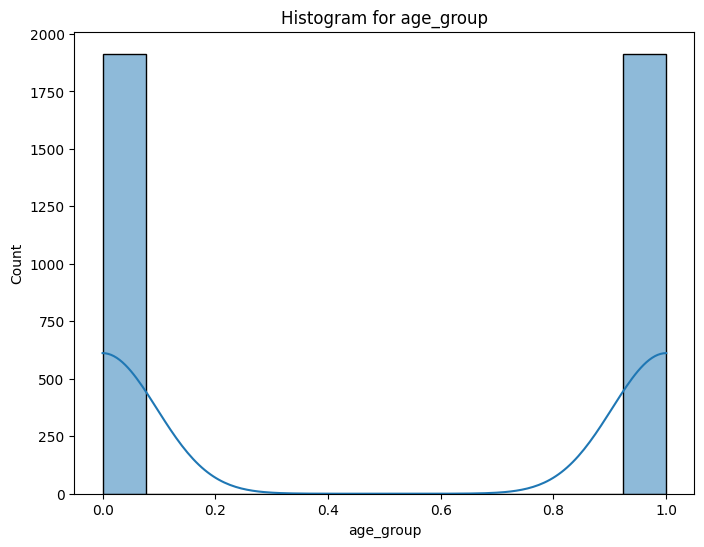

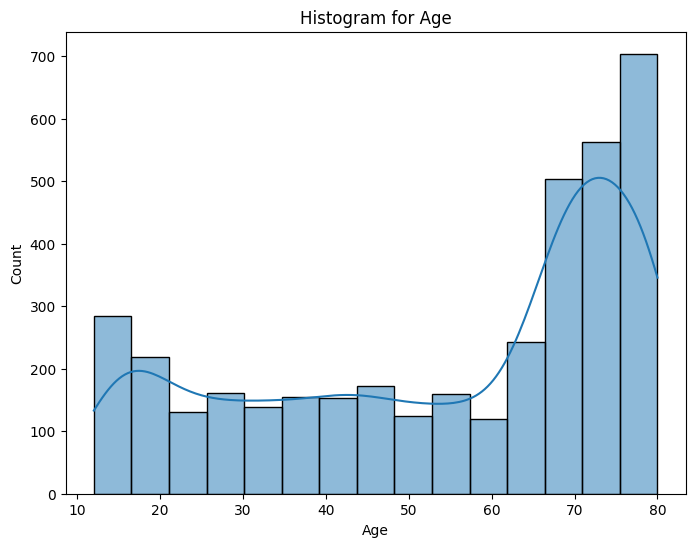

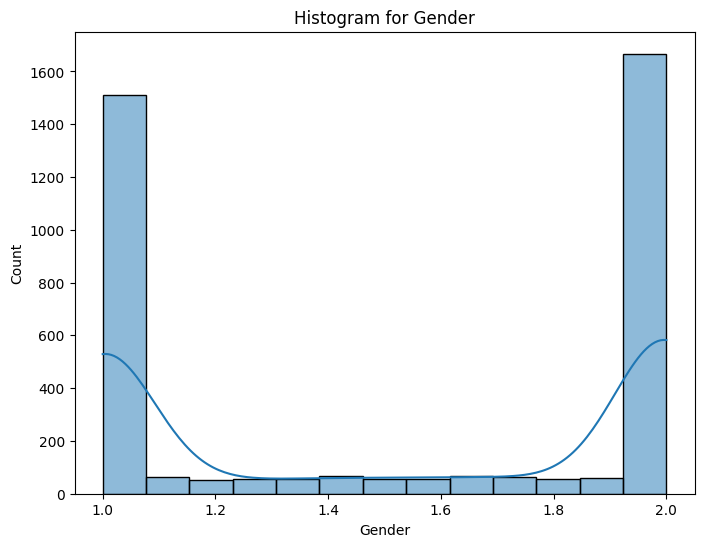

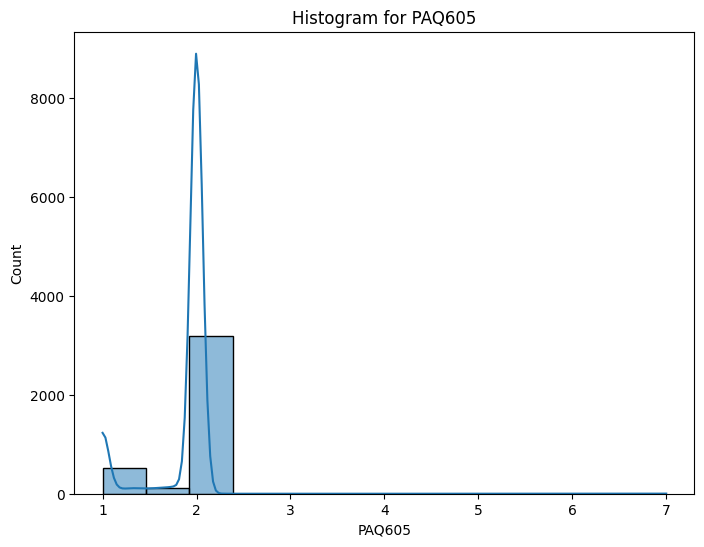

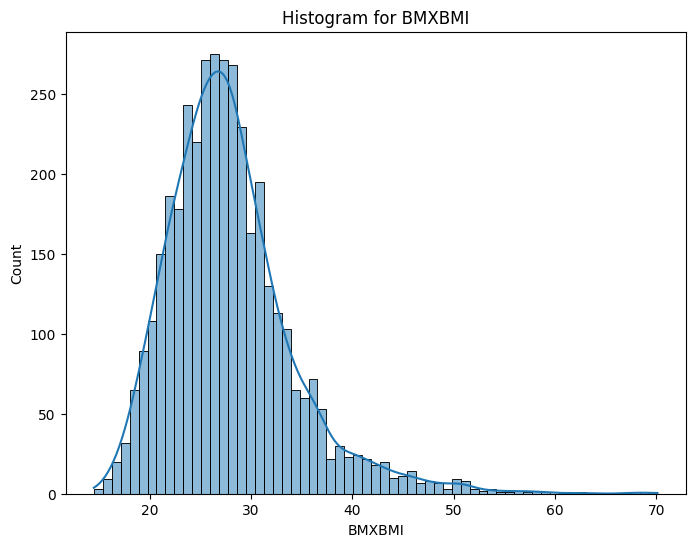

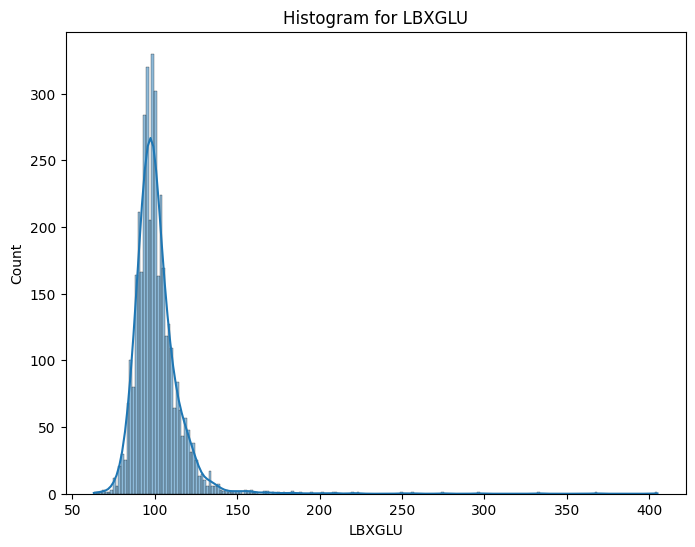

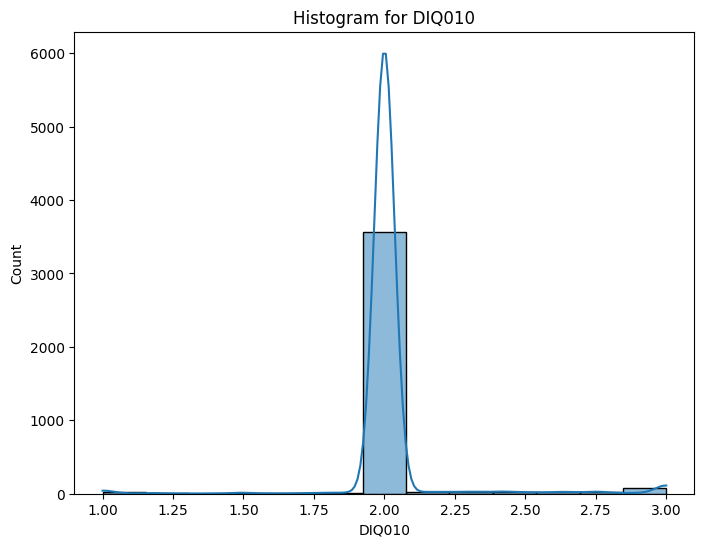

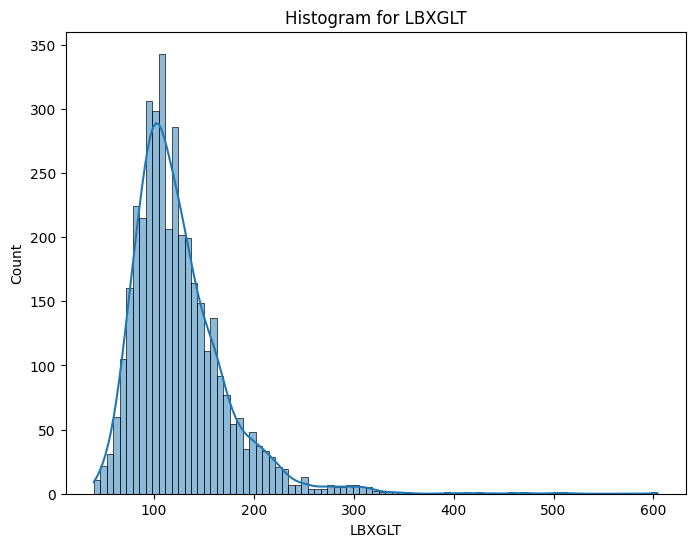

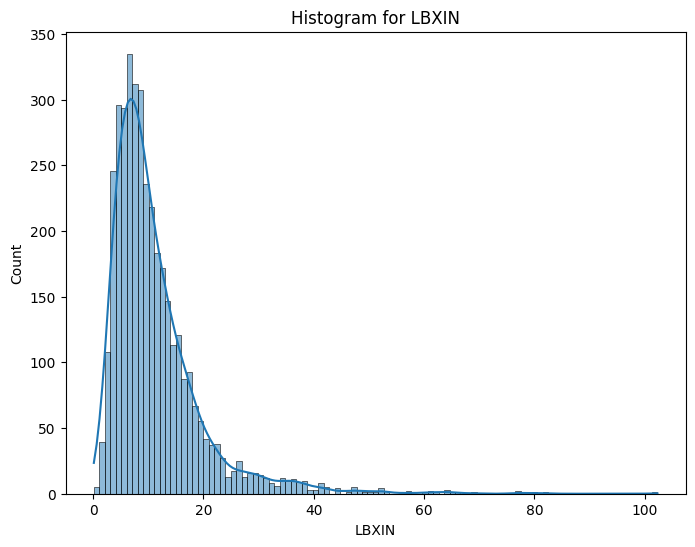

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating a loop to visualize each column individually. 

for column in df2.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

#### Using Histogram to visualize each column we can say that there are outliers and some columns, however, we are not subject matter to say what to do with the outliers, we are going to keep them. 

# The difference LDA and PCA


#### PCA ( Principal component Analysis) 

1. PCA is a Unsupervised method that try to find the directions of variance in the data. 
2. PCA does not consider class labels during the dimensionality reduction. 
3. PCA transform the data to a new set of variables keeping as much as possible of variance. 


#### LDA. 

1. Different of PCA, LDA try to takes into account the class labels during the process of dimensionality reduction. 
2. LDA is a supervised method. 



In a general is better if you try to apply both methods and plot it and see which one fits in your dataset. 

I will apply both methods and make a decision about which one I will use depending of the results collects. 


##### First Step Scaler the X

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [36]:
X = df2.drop(columns='age_group')
y = df2['age_group']

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_scaled

array([[ 0.28924531,  1.03018329,  0.40795741, ..., -0.11262392,
         0.53545323,  0.42794275],
       [-1.2910678 ,  1.03018329,  0.40795741, ..., -0.11262392,
        -0.96232587, -0.8715754 ],
       [-1.74258584, -1.12253508,  0.40795741, ..., -0.11262392,
        -1.219088  , -0.602507  ],
       ...,
       [ 0.63495674,  1.03018329,  0.40795741, ..., -0.11262392,
        -0.14860263, -0.36463408],
       [ 0.52417032,  1.03018329, -2.41618418, ..., -5.24627499,
        -0.37206395, -0.54091865],
       [ 0.78591515, -1.12253508,  0.40795741, ..., -0.11262392,
         2.28338492, -0.36163172]])

# Second step Appling PCA

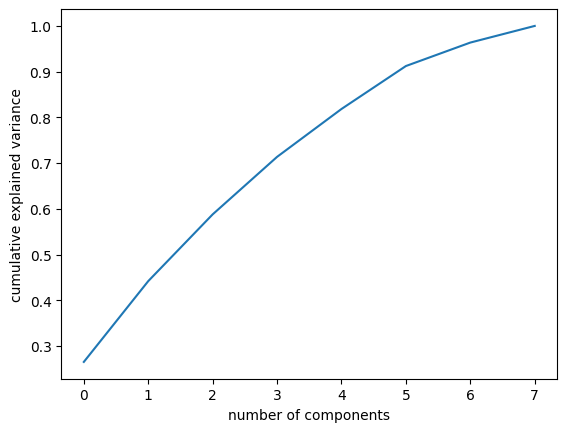

In [39]:
pca = PCA().fit(X_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

# To be able to get almost 100% we need to use 6 or 7 components. 

In [40]:
pca = PCA(6)
projected = pca.fit_transform(X_scaled)


In [41]:
projected.shape

(3828, 6)

In [42]:
X_pca = pd.DataFrame(projected)

In [43]:
X_pca['age_group'] = df2['age_group']


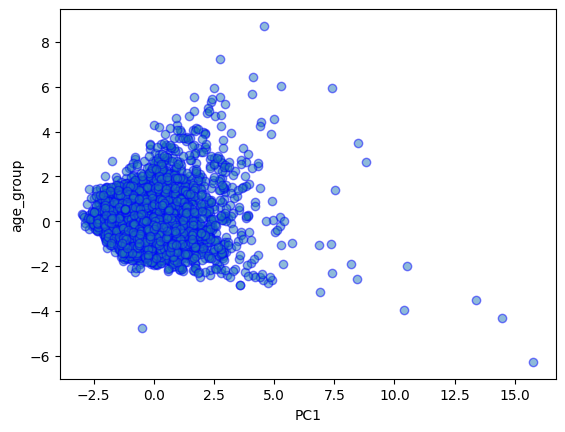

In [44]:
plt.xlabel('PC1')
plt.ylabel('age_group') 

plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], alpha=0.5, edgecolors='b') 

plt.show()

##### The plot shows us the correlation between PC1 and Age group, it means that PC1 increases age also increases. 

In [45]:
X_pca.head()

,0,1,2,3,4,5,age_group
0,1.277885,0.287019,1.249376,0.174039,-0.331225,0.023230,0
1,-2.179682,-0.214589,0.686023,-0.052227,0.116242,1.149391,0
2,-2.057444,0.578224,-0.781013,-0.299094,1.375004,0.379326,0
3,-0.344435,1.087096,-0.555885,-0.211698,1.330030,-0.035073,0
4,-0.366487,1.862667,-0.363283,0.904266,-2.185592,0.248816,0


# LDA 

In [46]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [47]:
X_lda1 = lda.fit_transform(X_scaled, y)


In [48]:
lda_df = pd.DataFrame(data=X_lda1, columns=['LDA Component 1'])
lda_df['age_group'] = y

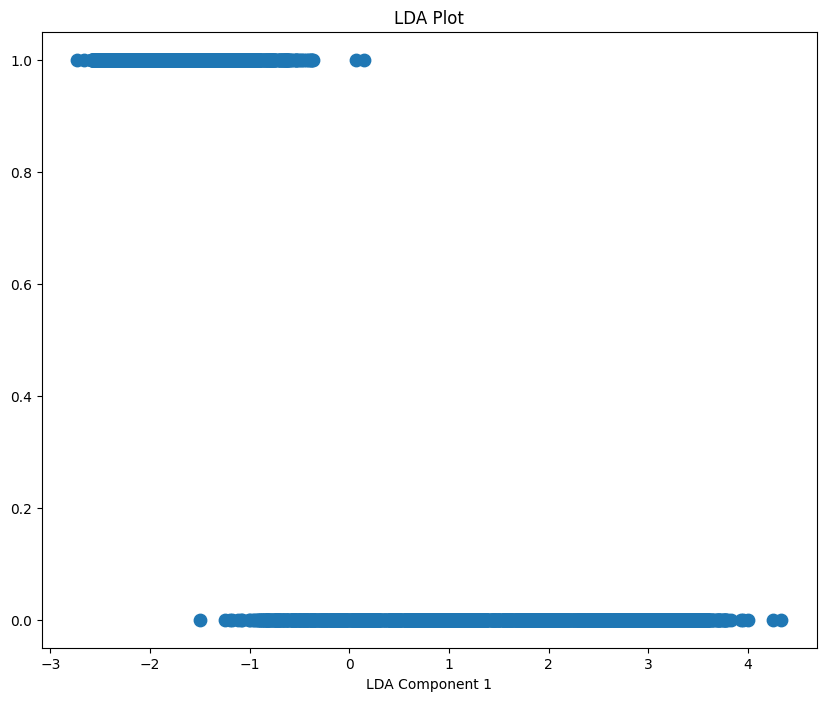

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(x=lda_df['LDA Component 1'], y=lda_df['age_group'], s=80)
plt.title('LDA Plot')
plt.xlabel('LDA Component 1')
plt.show()


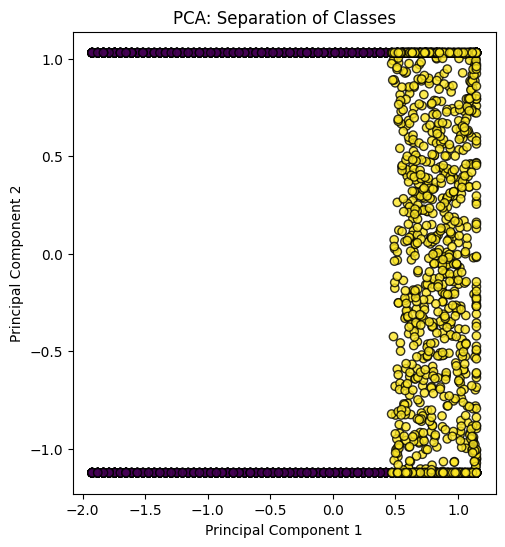

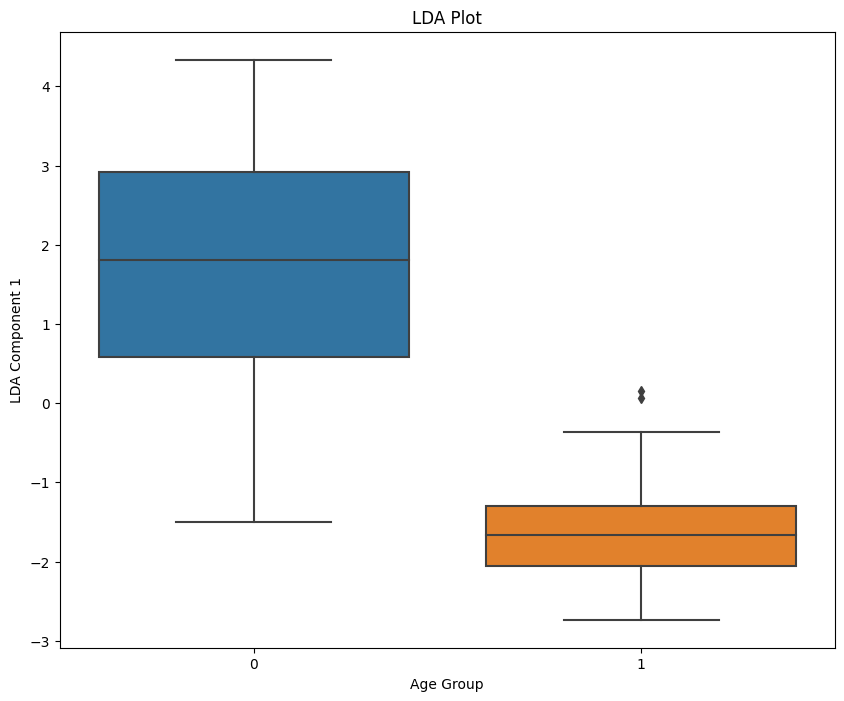

In [50]:
# Compare both 
plt.figure(figsize=(12, 6))

# PCA Visualization
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('PCA: Separation of Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# LDA Visualization

plt.figure(figsize=(10, 8))
sns.boxplot(x='age_group', y='LDA Component 1', data=lda_df)
plt.title('LDA Plot')
plt.xlabel('Age Group')
plt.ylabel('LDA Component 1')
plt.show()



##### Both methods are useful, however, you can use both in different occasions depending on your goal. In my case I will try to use both method and see the affects in my machine learning algorithm









# Machine Learning. 

       In order to find the best machine learning algorithm, I performed a function and loop in python to test more than one algorithm and show me the best fit for my model. 
       As python is one of the best programming language to automate tasks I realized I could improve my code to create a function and loop to split my data, to assign to my X my dataset without my target and  assign Y to my target variable and Also, I create a list with five machine learning algorithms such as Random Forest Classifier , Support Vector Machine SVC, K-Nearest Neighbours, Logistic Regression Logistic Regression, Decision Tree, Naive Bayes GaussianNB and I created a loop that says for name in my algorithms items ( The list I created) train the model, make predictions, evaluate the model and print the results. 


1. Using the dataset with PCA applied. 

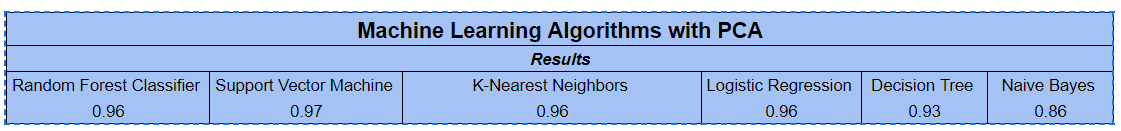

2. Using the dataset with LDA. 

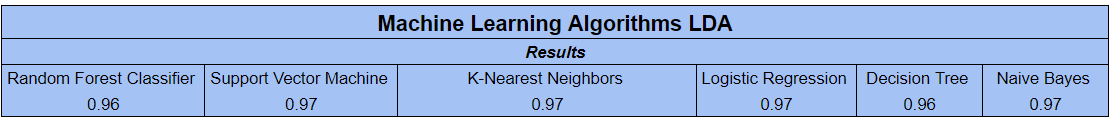

3. Using the dataset without any of these methods. 

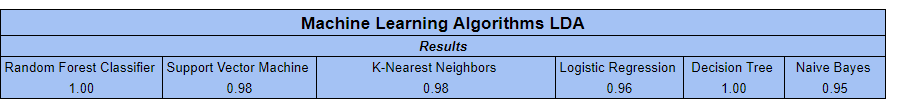



#### Explanation about the results: 

   I've applied a function / loop the return the results of each Machine Learning Algorithms is evident the difference in some algorithms when applied with PCA or applied without it or using LDA as well. 
The best result was Random Forest Classifier I will perform it to be able to get the best results to my Model. 

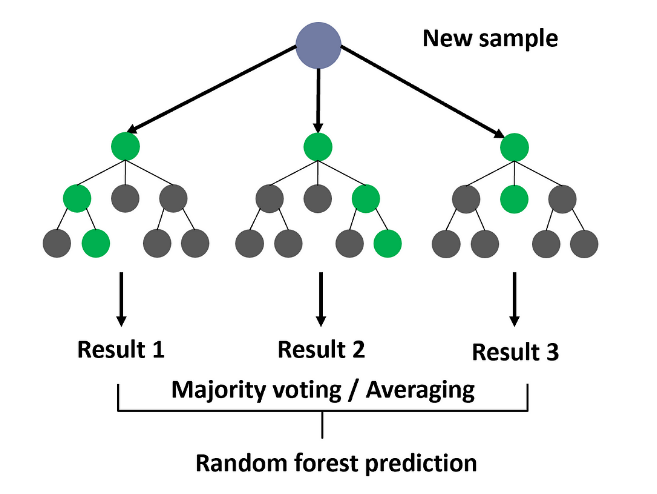



The experiment can be found here in this jupyter notebook https://github.com/SamuelhBueno/DP_CA/blob/main/CA2%20-%20DP%20ML%20Samuel-Copy1.ipynb. 




In [53]:
#pip install graphviz

# Instal the librarie graphviz to visualize decision three

#### Importing Libraries 

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [55]:
# Split the data into features (X) and target (y)
X = X_pca.drop('age_group', axis=1)
y = X_pca['age_group']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #20% for the test

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = rf.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9503916449086162


In [59]:
# Split the data into features (X) and target (y)
X = X_pca.drop('age_group', axis=1)
y = X_pca['age_group']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #30% for the test

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
y_pred = rf.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95822454308094


# Evident that when we split our test size to 30% we improved our results from 0.950 to 0.958, however, the diffence is significantly small. 

### The results was 96%, Let's visualize it plotting the decision tree from the forest. 


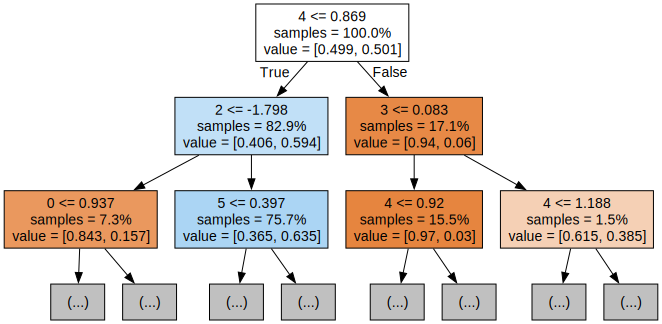

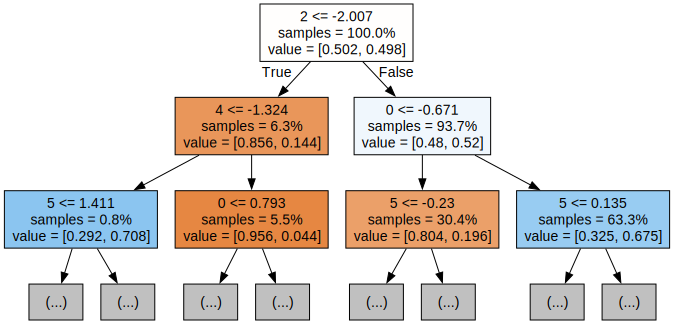

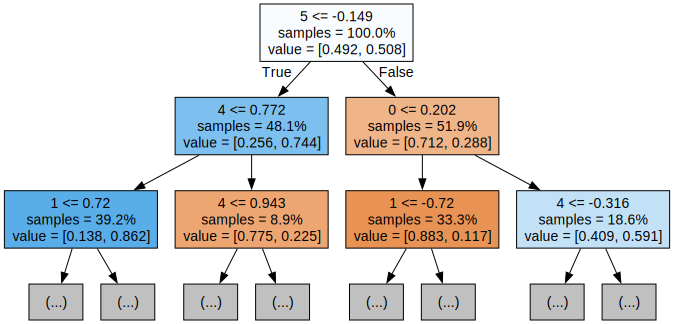

In [63]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [64]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier

rf = RandomForestClassifier()

# Use random search to find the best hyperparameters

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A2BAB16910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A2BA7CD510>})

In [65]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 496}


# As we can see the best hyperparameters is max_depth: 19 n_estimators: 434 


### We can use Confusion Matrix Display to visualize how our model performs and predict. 

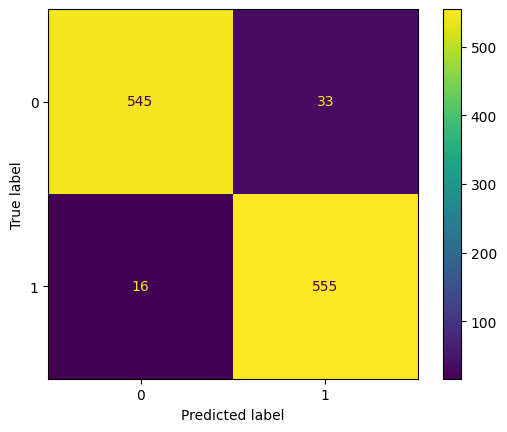

In [66]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### The results:
###### Interpreting the confusion matrix.
Accuracy: 96% of the predictions were correct.
1. True positives: 545 were correctly predicted.
2. False positive: 33 were incorrectly predicted.
3. True Negative: 555 were correctly predicted.
4. False Negative: 16 were incorrectly predicted.



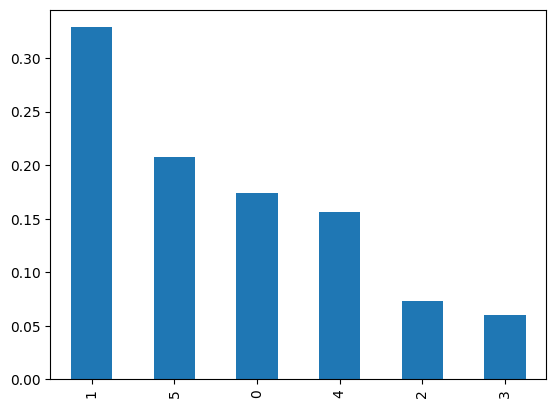

In [67]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

##### The feature number 1 seems to be more correlated to the target. However, the other features are also important to the model's predict. 



#### One of the best algorithms to my Model were SVM, I decided to Apply SVM as well as Random  Forest Classifier In order to get the best results and make experiments in my CA. 

In [68]:
#Import svm model
from sklearn import svm

In [69]:
clf = svm.SVC(kernel='linear') 
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [70]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9643167972149695


In [71]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Precision: 0.9476351351351351
Recall: 0.9824868651488616


# The results applying SVM was 0.94. 

### Let's talk about precision and recall: 

1. Precision: Indicates how many of the positive predict are actually postive if it is a high precision it means that our model is carefull to make positive predictions. Basically, the way it works is precision = true positives / true positives + false positives. 

2. Recall basically indicate how many of  the actual postives were correcly predicted, high recall means that our model is getting positive instances. The way it works is Recall = true positives / true positives + false negatives. 

To better understanding of it I will insert a image that Illustrates it. 

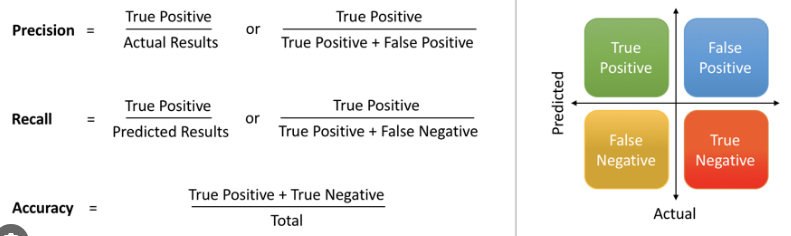

# Conclusion 


The dataset is really interesting due to the dataset is straightfoward there is no missing values and also 